## Importing libraries!

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1) Make the Regression!

In [16]:
#create a dataset using sklearn x scalar,y scalar,N = 1000
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=100,n_features=1,noise=20,random_state=101)

# 2) Plot and Analyze data

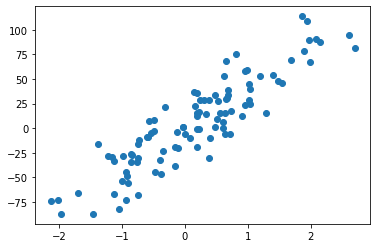

In [17]:
plt.scatter(x[:,0],y)
plt.show()

In [11]:
#print mean, standar deviation, and variance of x
print(np.mean(x))
print(np.std(x))
print(np.var(x))

0.02408500943664585
1.0546520360023408
1.1122909170438826


# 3)Generate polynomial features (terms) remember the equation 

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
poly.fit_transform(x)

array([[ 1.00000000e+00,  6.83508886e-01,  1.97875732e+00, ...,
         5.91595857e+00,  2.16812958e+00,  7.94594116e-01],
       [ 1.00000000e+00, -1.22308204e+00, -8.66885035e-01, ...,
         5.64892038e-01,  8.05888754e-01,  1.14970054e+00],
       [ 1.00000000e+00, -2.78396658e+00, -1.26665546e+00, ...,
         1.75590809e-03, -2.56919733e-04,  3.75918019e-05],
       ...,
       [ 1.00000000e+00,  3.14742439e-02, -1.77947042e+00, ...,
        -4.35259647e-04, -1.81365383e-02, -7.55719087e-01],
       [ 1.00000000e+00,  8.64164878e-01,  3.05631512e-01, ...,
         2.29124845e-02,  6.86894846e-02,  2.05924648e-01],
       [ 1.00000000e+00,  3.30865620e-01,  1.13001805e+00, ...,
        -4.82150172e-02,  2.10029391e-02, -9.14908834e-03]])

# 4)Choose estimator (regression model)

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

In [14]:
#Linear least squares with l2 regularization (use “Ridge”)
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(poly.fit_transform(x),y)

Ridge(alpha=1)

In [18]:
# perform train test split  
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

# 5)Perform cross validation (5-fold)

In [19]:
# cross validation 5 folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ridge,poly.fit_transform(x_train),y_train,cv=5)
print(scores)

[0.60784404 0.72605701 0.81936639 0.87631943 0.77582317]


In [22]:
# print all curves in same plot
plt.plot(x,y,'.',label='original data')
plt.plot(x_train,y_train,'.',label='training data')
plt.plot(x_test,y_test,'.',label='test data')
#plt.plot(x,ridge.predict(poly.fit_transform(x)),label='prediction')
plt.legend()
plt.show()
